# A medical insurance company wants to better understand the factors that influence the cost of health insurance for individuals. They have collected a dataset containing information about different individuals, including their age, gender, BMI, number of children, smoking status, and region.

## Problem Statements
1. What are the most important factors that affect medical expenses?
2. How well can machine learning models predict medical expenses?
3. How can machine learning models be used to improve the efficiency and profitability of health insurance companies?

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv(r"C:\Users\Wills Michael\OneDrive\Documents\DATA ANALYST PROFESSIONAL\Kaggle Project\Medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [41]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
import seaborn as sns

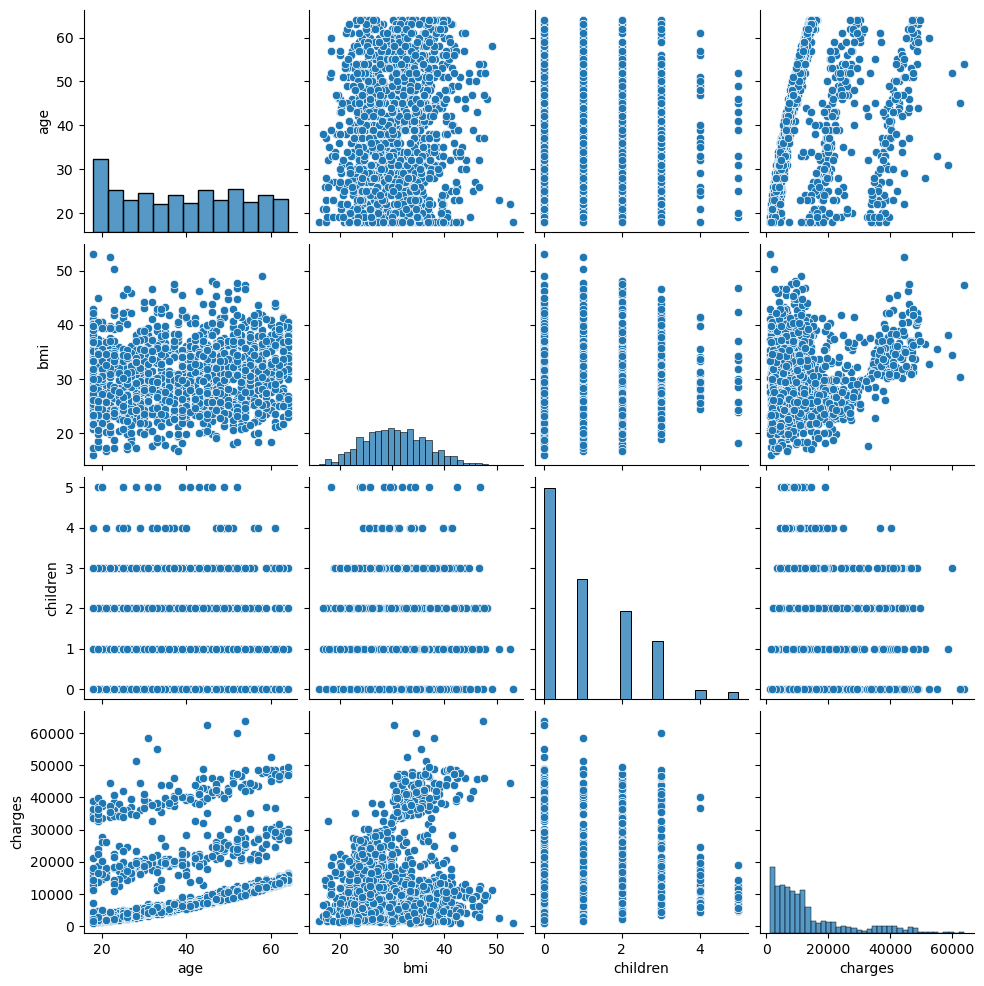

In [11]:
sns.pairplot(df)

In [76]:
# Converting the categorical data to numeric data
df_new = pd.get_dummies(df, columns=['sex','smoker','region'])

In [17]:
df.shape

(2772, 7)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df[['age', 'bmi', 'children']]
y = df[['charges']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=123)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model1= LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred1 = model1.predict(X_test)
y_pred1[:5]

array([[14335.04236502],
       [18629.54667407],
       [13213.63157495],
       [ 9908.48154618],
       [15734.73004211]])

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
acc1 = r2_score(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)

print(f"R square is {acc1}")
print(f"mse 1 is {mse1}")

R square is 0.11167757930248357
mse 1 is 138159855.51881984


In [26]:
import matplotlib.pyplot as plt

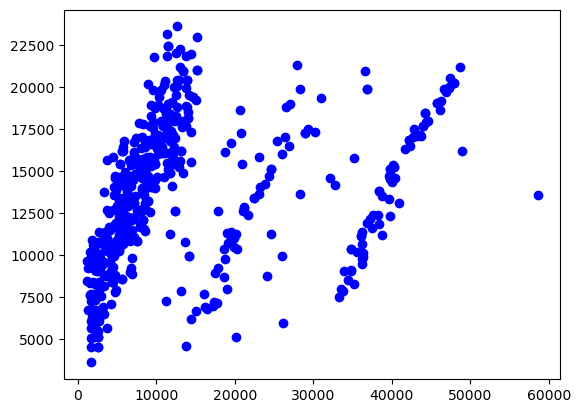

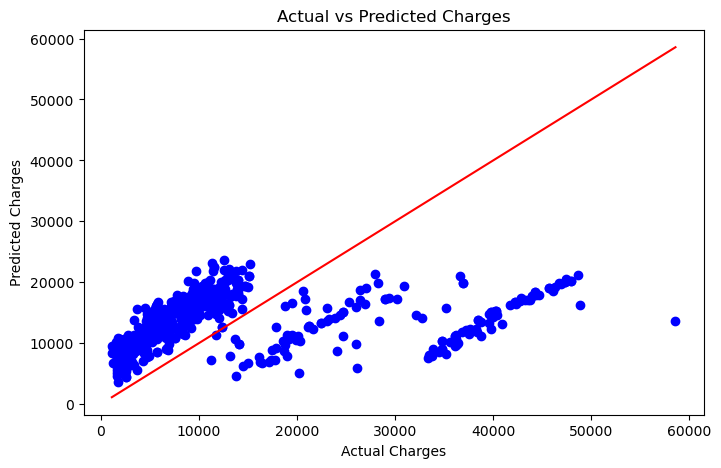

In [29]:
plt.scatter(y_test, y_pred1, color='blue')
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred1, color='blue')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Diagonal line
plt.show()

In [30]:
X_new = df[['age', 'bmi']]

In [31]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, train_size=0.8, random_state=123)

In [32]:
model2 = LinearRegression()
model2.fit(X_new_train, y_train)
y_pred2 = model2.predict(X_new_test)

In [33]:
acc2 = r2_score(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

print(f"R square is {acc2:.4f}")
print(f"mse 1 is {mse2:.4f}")

R square is 0.1117
mse 1 is 138786887.0366


In [34]:
X_new1 = df[['children']]

In [35]:
X_new_train1, X_new_test1, y_train, y_test = train_test_split(X_new1, y, train_size=0.8, random_state=123)

In [36]:
model3 = LinearRegression()
model3.fit(X_new_train1, y_train)
y_pred3 = model3.predict(X_new_test1)

In [37]:
acc3 = r2_score(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)

print(f"R square is {acc3:.4f}")
print(f"mse 1 is {mse3:.4f}")

R square is 0.0044
mse 1 is 154847111.5013


In [43]:
df_numeric.corr()

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


In [44]:
corr = df_numeric.corr()

<Axes: >

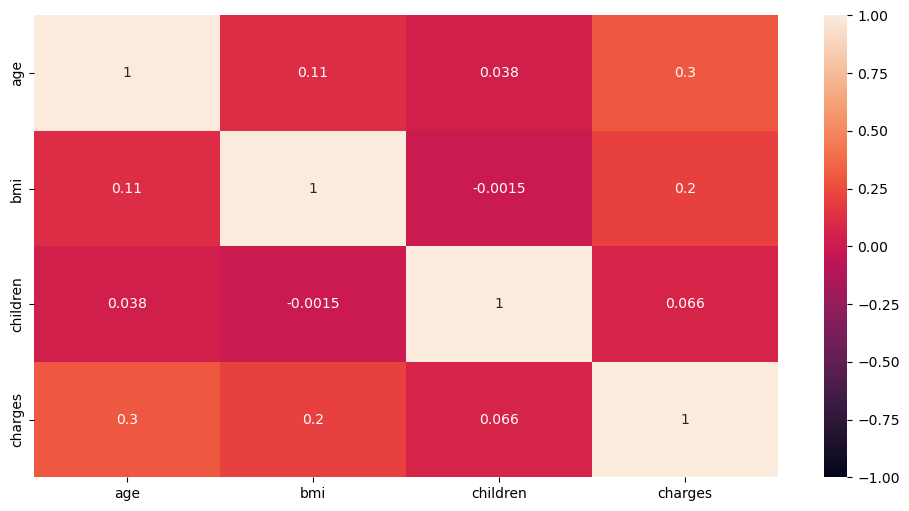

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1)

In [48]:
# Splitting the data into train and test splits

X = df.drop('charges', axis=1)
y = df['charges']


In [49]:
X.ndim

2

In [50]:
y.ndim

1

In [51]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast
2768,21,female,34.600,0,no,southwest
2769,19,male,26.030,1,yes,northwest
2770,23,male,18.715,0,no,northwest


In [52]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [57]:
print(X_train.dtypes)  # Check column data types
print(X_train.head())  # Inspect the first few rows

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object
      age     sex    bmi  children smoker     region
266    40    male  19.80         1    yes  southeast
207    35    male  27.74         2    yes  northeast
215    41  female  37.10         2     no  southwest
1068   63    male  21.66         1     no  northwest
1973   34  female  30.21         1    yes  northwest


In [62]:
print(X_train.dtypes)  # Check column data types
print(X_train.head())  # Inspect the first few rows

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object
      age     sex    bmi  children smoker     region
266    40    male  19.80         1    yes  southeast
207    35    male  27.74         2    yes  northeast
215    41  female  37.10         2     no  southwest
1068   63    male  21.66         1     no  northwest
1973   34  female  30.21         1    yes  northwest


In [64]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])  # 'male' → 1, 'female' → 0

In [68]:
X_train = pd.get_dummies(X_train, columns=["sex"], drop_first=True)  # Creates separate binary columns

In [69]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)  # Replace NaN values with zero

In [71]:
# Creating the model using LinearRegression
model1 = LinearRegression()
# fitting the model
model1.fit(X_train, y_train)

LinearRegression()

In [72]:
#Evaluation the model based on the trained data
y_pred = model1.predict(X_train)
y_pred[:5]

array([10742.02349549, 12535.61757054, 15364.32873903, 16987.94566508,
       10951.35374992])

In [73]:
from sklearn.metrics import r2_score, mean_squared_error

## Evaluating the model based on train data

In [74]:
def evaluate(y_train, y_pred):
    r_squ = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    
    print(f'Accuracy = {r_squ *100:.4f}%')
    print(f'MSE = {mse:.4f}')

In [75]:
evaluate(y_train, y_pred)

Accuracy = 12.6738%
MSE = 127147687.2468


## Actionable Insights

 * Smoking status emerged as the strongest predictor of medical insurance charges — smokers tend to pay significantly higher premiums due to elevated health risks.

 * Age and BMI showed a positive correlation with insurance costs, suggesting that older and overweight individuals are more likely to incur higher medical expenses.

 * Gender and region had relatively minimal influence, implying that pricing strategies may not need heavy regional or gender-based adjustments.

 * Incorporating machine learning models, especially regression-based approaches, can help insurance firms predict medical expenses with high accuracy, enabling more precise premium calculations.

 * By leveraging predictive analytics, insurers can optimize risk assessment, personalize pricing, and improve profitability through data-driven decision-making.

## Conclusion

The analysis demonstrates that age, BMI, and smoking status are the most significant determinants of medical insurance costs. Implementing machine learning-based predictive models can greatly enhance the efficiency and fairness of pricing strategies in health insurance. These insights empower insurance companies to design more accurate, equitable, and profitable policies while promoting healthier lifestyles among clients.

## Author(s)

[<h4> Unyime Michael </h4>](https://www.linkedin.com/in/wills-unyime-michael-pmiim-8b997375/)